### **MA-INF4325 - Lab Data Science in Practice - Spatio Temporal Data Analytics**

Supervisor : PROF. DR. ELENA DEMIDOVA

Assistant  : ALISHIBA DSOUZA          
                      
UNIVERSITY OF BONN


**Lab Topic  is Prediction of Covid-19 Spread**



*   219 Countries and Territories around the world have reported a total of 122,435,351 confirmed cases of the coronavirus(COVID-19) and a death toll of 2,704,440 deaths.
*   The aim of this project is to predict the spread of this pandemic in the countries which are highly affected by this virus. And also identifying the factors affecting the spread like government policies, healthcare systems, etc in such difficult times.
*   We will work as per below guidelines to achieve the results:
DSworkflow.PNG

**SECTION 3 : MODEL BUILDING**

We have already build ARIMA Time Series Model to predict the future trend of Confirmed Cases in USA and Germany.

In this notebook, we will build **VAR 'Vector autoregression'** model.

This falls under **Multivariate TIme Series Analysis/Forecasting** because it involves more than one time dependant variable. That's why its called Multivariate. **Each variable not only depends on its past value but also on other variables.**

In [ ]:
# IMPORTING LIBRARIES
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

# Mathematics
import numpy as np
from numpy import log

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine Learning
from sklearn import preprocessing
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.vector_ar.vecm import coint_johansen


%matplotlib inline

In [ ]:
# To display all the available columns and rows in the output :

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_columns', 50)

In [ ]:
# READING THE DATASET

covid_data = pd.read_csv('Final_Covid_Dataset.csv')
covid_data.drop(covid_data.filter(regex="Unname"),axis=1, inplace=True)                   # To drop a column named 'unnamed:0'

# SOME BASIC INFORMATION ABOUT THE DATASET

print('\n Dimensions of the Dataset:', covid_data.shape)                            # No. of rows(records) * No. of columns(features)
print('\n First Few rows are: \n', covid_data.head())                               # First few records looks like
print('\n Columns are:\n', covid_data.columns)                                      # Name of the features
print('\n Datatypes of features are:\n', covid_data.info())                         # Datatypes of the features


# Converting datatype of 'date':
covid_data['date'] = pd.to_datetime(covid_data['date'])


 Dimensions of the Dataset: (34111, 69)

 First Few rows are: 
              date          country_name  mobility_retail_and_recreation  \
0  2/15/2020 0:00  United Arab Emirates                             0.0   
1  2/16/2020 0:00  United Arab Emirates                             1.0   
2  2/17/2020 0:00  United Arab Emirates                            -1.0   
3  2/18/2020 0:00  United Arab Emirates                            -2.0   
4  2/19/2020 0:00  United Arab Emirates                            -2.0   

   mobility_grocery_and_pharmacy  mobility_parks  mobility_transit_stations  \
0                            4.0             5.0                        0.0   
1                            4.0             4.0                        1.0   
2                            1.0             5.0                        1.0   
3                            1.0             5.0                        0.0   
4                            0.0             4.0                       -1.0   

   mobili

# Predicting future trend of Confirmed Cases for USA

In a VAR model, each variable is a linear function of the past values of itself and the past values of all the other variables.

**Here we want to understand the relationship between various variables and  make better forecasting.**

In [ ]:
# USA
USA_data = covid_data[covid_data['country_name'] == 'United States of America']
print('\n Dimensions of the USA dataset \n ',USA_data.shape)


 Dimensions of the USA dataset 
  (328, 69)


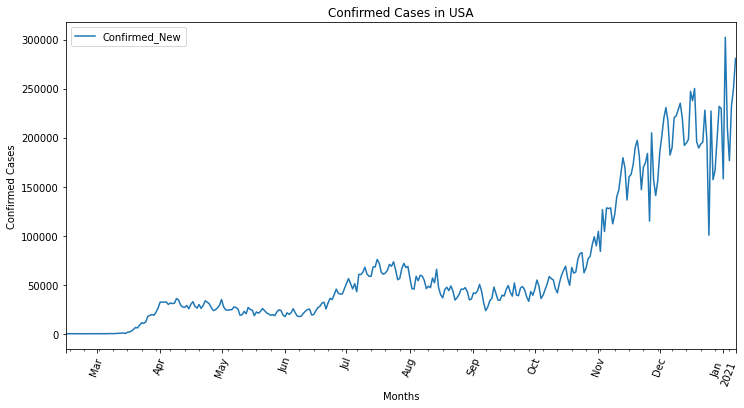

In [ ]:
# Confirmed Covid Cases in USA:

# fig = px.line(USA_data, x = USA_data['date'], y = USA_data['Confirmed_New'], title = 'Confirmed Covid Cases in USA')
# fig.update_xaxes(rangeslider_visible = True)
# fig.show()

plt.rcParams["figure.figsize"] = [12,6]

USA_data.plot.line(x="date", y='Confirmed_New')

plt.title('Confirmed Cases in USA')
plt.xlabel('Months')
plt.xticks(rotation=70)
plt.ylabel('Confirmed Cases')
plt.show()

# **VAR for USA**



We want to study how goverment policies are affecting the spread of covid-19. So we will use the variables related to goverment policies and those are :

'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'stay_at_home_requirements','international_travel_controls','testing_policy', 'stringency_index'


In [ ]:
USA_data = USA_data[['date', 'country_name', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 
                     'stay_at_home_requirements','international_travel_controls', 'testing_policy', 'stringency_index','Confirmed_New']]
print(USA_data.columns)

Index(['date', 'country_name', 'school_closing', 'workplace_closing',
       'cancel_public_events', 'restrictions_on_gatherings',
       'stay_at_home_requirements', 'international_travel_controls',
       'testing_policy', 'stringency_index', 'Confirmed_New'],
      dtype='object')


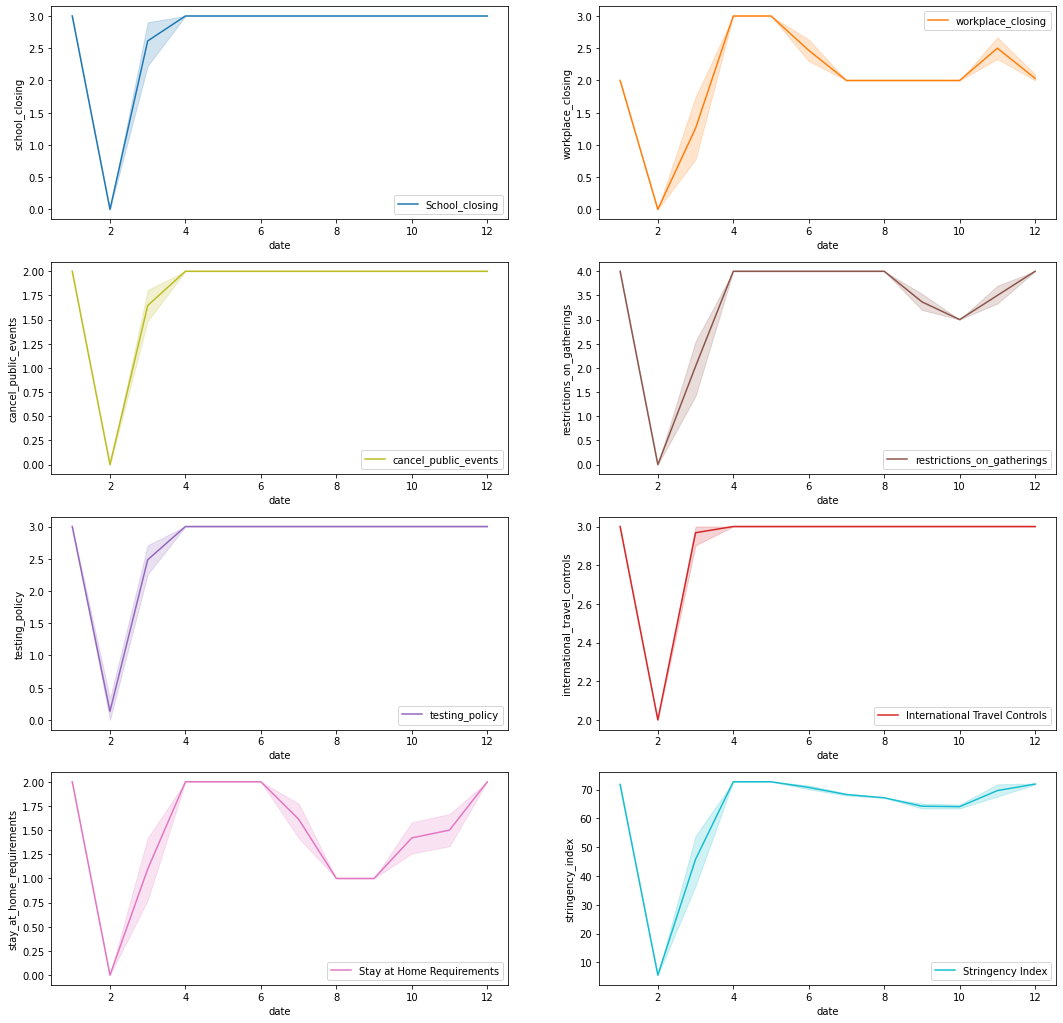

In [ ]:
# Visualizing each of the feature:

plt.rcParams["figure.figsize"] = [18,18]
fig, axs = plt.subplots(4, 2)

sns.lineplot(x = USA_data.date.dt.month, y = USA_data.school_closing, color="#1f77b4", label = 'School_closing', ax=axs[0, 0])
sns.lineplot(x = USA_data.date.dt.month, y = USA_data.workplace_closing, color="#ff7f0e", label = 'workplace_closing', ax=axs[0, 1])

sns.lineplot(x = USA_data.date.dt.month, y = USA_data.cancel_public_events, color="#bcbd22", label = 'cancel_public_events', ax=axs[1, 0] )
sns.lineplot(x = USA_data.date.dt.month, y = USA_data.restrictions_on_gatherings, color="#8c564b", label = 'restrictions_on_gatherings', ax=axs[1, 1])

sns.lineplot(x = USA_data.date.dt.month, y = USA_data.testing_policy, color="#9467bd", label = 'testing_policy', ax = axs[2, 0])
sns.lineplot(x = USA_data.date.dt.month, y = USA_data.international_travel_controls, color="#d62728", label = 'International Travel Controls', ax = axs[2, 1])

sns.lineplot(x = USA_data.date.dt.month, y = USA_data.stay_at_home_requirements,color="#e377c2", label = 'Stay at Home Requirements', ax = axs[3, 0])
sns.lineplot(x = USA_data.date.dt.month, y = USA_data.stringency_index, color="#17becf", label = 'Stringency Index', ax = axs[3, 1])


Each of the series has somewhat similar trend/pattern.

**Testing Causation using Granger’s Causality Test**

We want to know if one time series is useful in forecasting other, that is one time series is a cause of another time series then in such cases we use Granger's Casuality Test.

**Null Hypothesis** : X(predictors) does not cause Y(response variables)

**Alternate Hypothesis** :  X(predictors) cause Y(response variables)

In [ ]:
USA_data_granger = USA_data.drop(columns=['date','country_name','Confirmed_New'])
variables = list(USA_data_granger.columns)

test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    

    df_granger = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df_granger.columns:
        for r in df_granger.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=12, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(12)]
            # if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df_granger.loc[r, c] = min_p_value
    df_granger.columns = [var + '_x' for var in variables]
    df_granger.index = [var + '_y' for var in variables]
    return df_granger

   
USA_granger_matrix = grangers_causation_matrix(USA_data_granger, variables = USA_data_granger.columns)   
# print(USA_granger_matrix)
# print(USA_granger_matrix[USA_granger_matrix < 0.05])

grangers_causation_matrix(USA_data_granger, variables = USA_data_granger.columns)

,school_closing_x,workplace_closing_x,cancel_public_events_x,restrictions_on_gatherings_x,stay_at_home_requirements_x,international_travel_controls_x,testing_policy_x,stringency_index_x
school_closing_y,1.0000,1.0000,0.0,1.0,1.0000,0.0000,0.0,0.1000
workplace_closing_y,0.0125,1.0000,0.0,0.0,0.0000,0.0305,0.0,0.0000
cancel_public_events_y,0.0000,0.0000,1.0,0.0,0.0000,0.0000,0.0,0.0000
restrictions_on_gatherings_y,0.0000,0.0000,0.0,1.0,0.0000,0.0000,0.0,0.0000
stay_at_home_requirements_y,0.0000,0.7008,0.0,0.0,1.0000,0.0622,0.0,0.0000
international_travel_controls_y,1.0000,1.0000,0.0,1.0,1.0000,1.0000,0.0,0.1437
testing_policy_y,0.0000,0.1730,0.0,0.0,0.2393,0.0000,1.0,0.0000
stringency_index_y,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0,1.0000


The values in the table are the P-Values. P-Values lesser than the significance level (0.05), implies that the Null Hypothesis that is X does not cause Y can be rejected. So, in the above matrix we can see most of the values are below 0.05, some variables have values greater than 0.05. There we fail to reject the null hypothesis.

Otherwise, pretty much all the variables are causing all the other variables.

**Cointegration Test**

A cointegration test is used to establish if there is a correlation between several time series.

In [ ]:
USA_data_integ = USA_data.drop(columns=['date','country_name','Confirmed_New'])

def cointegration_test(data, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(data,0,1)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(data.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(USA_data_integ)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
school_closing ::  1055.1    > 159.529   =>   True
workplace_closing ::  668.44    > 125.6185  =>   True
cancel_public_events ::  396.6     > 95.7542   =>   True
restrictions_on_gatherings ::  176.91    > 69.8189   =>   True
stay_at_home_requirements ::  112.77    > 47.8545   =>   True
international_travel_controls ::  55.26     > 29.7961   =>   True
testing_policy ::  27.06     > 15.4943   =>   True
stringency_index ::  6.41      > 3.8415    =>   True


**Train/Test Split**

In [ ]:
print(USA_data.columns)
USA_data.drop('country_name', axis = 1,inplace = True)
USA_data.set_index('date',inplace = True)

Index(['date', 'country_name', 'school_closing', 'workplace_closing',
       'cancel_public_events', 'restrictions_on_gatherings',
       'stay_at_home_requirements', 'international_travel_controls',
       'testing_policy', 'stringency_index', 'Confirmed_New'],
      dtype='object')


In [ ]:
step = 15
print(USA_data.columns)

# We will only consider 'school_closing', 'workplace_closing','international_travel_controls','testing_policy','stringency_index', and 'Confirmed Cases'
USA_df = USA_data[['school_closing', 'workplace_closing','international_travel_controls','testing_policy','stringency_index','Confirmed_New']]        # THIS IS df from article
print(USA_df.columns)

USA_train, USA_test = USA_df[0:-step], USA_df[-step:]

print('Shape of Training Set :',USA_train.shape)
print('Shape of Test Set',USA_test.shape)

# print(USA_train.head())
# print(USA_test.head())

Index(['school_closing', 'workplace_closing', 'cancel_public_events',
       'restrictions_on_gatherings', 'stay_at_home_requirements',
       'international_travel_controls', 'testing_policy', 'stringency_index',
       'Confirmed_New'],
      dtype='object')
Index(['school_closing', 'workplace_closing', 'international_travel_controls',
       'testing_policy', 'stringency_index', 'Confirmed_New'],
      dtype='object')
Shape of Training Set : (313, 6)
Shape of Test Set (15, 6)


**Checking Stationarity of the Series**

In [ ]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

# ADF Test on each column
for name, column in USA_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "school_closing" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.0216
 No. Lags Chosen       = 0
 Critical value 1%     = -3.451
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.0013. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "workplace_closing" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.7904
 No. Lags Chosen       = 0
 Critical value 1%     = -3.451
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.0597. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "international_travel_controls" 
    -----------------------------------------------
 Null Hy

Some features are non stationary. We would difference them once and we will check again.

In [ ]:
# 1st difference
USA_train_differenced = USA_train.diff().dropna()

In [ ]:
# Again ADF Test on each column of 1st Differences Dataframe
for name, column in USA_train_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "school_closing" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -17.6352
 No. Lags Chosen       = 0
 Critical value 1%     = -3.452
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "workplace_closing" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -17.5973
 No. Lags Chosen       = 0
 Critical value 1%     = -3.452
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "international_travel_controls" 
    -----------------------------------------------
 Null Hypothesis: Data has unit ro

Now, Our series is stationary.

**To Select the Order (P) of VAR model**

To select the right order of the VAR model, we iteratively fit increasing orders of VAR model and pick the order that gives a model with least AIC.

In [ ]:
# Finding the right order of VAR Model
model = VAR(USA_train_differenced)
order = model.select_order(maxlags=12)
order.summary()

,AIC,BIC,FPE,HQIC
0,2.035,2.109,7.649,2.064
1,1.605,2.123,4.977,1.812
2,0.9159,1.879,2.500,1.301
3,-58.75,-57.34,3.059e-26,-58.19
4,-54.13,-52.28,3.102e-24,-53.39
5,-55.76,-53.47,6.096e-25,-54.84
6,-57.08,-54.34,1.634e-25,-55.98
7,-53.47,-50.28,6.080e-24,-52.19
8,-48.99,-45.36,5.376e-22,-47.54
9,-48.38,-44.31,9.975e-22,-46.75


From above VAR Order Selection Table, **We can see that at lag 8 the value is increasing as compared to the value at lag 7.**

However the lowest AIC value is at lag 12. We will try different lag values and experiment with the model and keep the one which gives high accuracy in prediction.

For now, We will start with lag = 7

However, The accuracy was not optimal when the order of VAR was equal to 7. So I played with various order values. And it was at order 12 that the best accuracy was found.

In [ ]:
# Fitting the model to the training dataset with  lag order of VAR as 12
model_fitted = model.fit(12)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 22, Mar, 2021
Time:                     03:39:49
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -89.4443
Nobs:                     300.000    HQIC:                  -92.6877
Log likelihood:           12111.7    FPE:                6.79716e-42
AIC:                     -94.8518    Det(Omega_mle):     1.83993e-42
--------------------------------------------------------------------
Results for equation school_closing
                                       coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------------
const                                    -0.000000         0.000000           -0.000           1.000
L1.school_closing                         0.000000         0.000279     

**Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic**

In [ ]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(USA_df.columns, out):
    print((col), ':', round(val, 2))

school_closing : 3.46
workplace_closing : 2.0
international_travel_controls : 3.38
testing_policy : 1.0
stringency_index : 1.99
Confirmed_New : 1.99


The Durbin-Watson statistic will always have a value between 0 and 4. 
**Values from 0 to less than 2 indicate positive autocorrelation and values from from 2 to 4 indicate negative autocorrelation**

In [ ]:
# # Get the lag order
lag_order = model_fitted.k_ar
# print(lag_order) 

# Getting Input data for forecasting
forecast_input = USA_train_differenced.values[-lag_order:]
# print(USA_train_differenced.head())
print(forecast_input)

[[     0.      0.      0.      0.      0. -15227.]
 [     0.      0.      0.      0.      0. -27823.]
 [     0.      0.      0.      0.      0.   2469.]
 [     0.      0.      0.      0.      0.   3789.]
 [     0.      0.      0.      0.      0.  48989.]
 [     0.      0.      0.      0.      0.  -9613.]
 [     0.      0.      0.      0.      0.  12455.]
 [     0.      0.      0.      0.      0. -54115.]
 [     0.      0.      0.      0.      0.  -6602.]
 [     0.      0.      0.      0.      0.   4015.]
 [     0.      0.      0.      0.      0.   2050.]
 [     0.      0.      0.      0.      0.  32542.]]


In [ ]:
# Doing the prediction

fc = model_fitted.forecast(y=forecast_input, steps=step)

# Creating a dataframe of forecasted output

USA_data_forecast = pd.DataFrame(fc, index=USA_df.index[-step:], columns=USA_df.columns + '_forecast')
print(USA_data_forecast.columns)


Index(['school_closing_forecast', 'workplace_closing_forecast',
       'international_travel_controls_forecast', 'testing_policy_forecast',
       'stringency_index_forecast', 'Confirmed_New_forecast'],
      dtype='object')


In [ ]:
# Inverting the predictions as we differenced them :

def invert_predictions(df_train, df_forecast, second_diff = True):
    df_fc = df_forecast.copy()
    columns = df_train.columns
    # print(df_fc.columns)
    # print(columns)
    for col in columns:    
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_forecast'].cumsum()
    return df_fc


forecast_results = invert_predictions(USA_train, USA_data_forecast, True)        
forecast_results.loc[:, ['school_closing_forecast', 'workplace_closing_forecast',
       'international_travel_controls_forecast', 'testing_policy_forecast',
       'stringency_index_forecast', 'Confirmed_New_forecast']]

,school_closing_forecast,workplace_closing_forecast,international_travel_controls_forecast,testing_policy_forecast,stringency_index_forecast,Confirmed_New_forecast
date,,,,,,
2020-12-24,3.000000,2.054086,3.000000,3.006848,71.772933,241007.584789
2020-12-25,3.000000,1.948637,3.000000,3.013252,70.862634,229546.865515
2020-12-26,3.000000,1.922347,3.000000,3.018492,70.628025,201712.621257
2020-12-27,3.000000,2.017928,3.006848,3.022978,71.226484,184125.118465
2020-12-28,3.000000,1.945763,3.013252,3.027813,70.767611,183349.085167
2020-12-29,3.000000,1.952296,3.018492,3.040855,71.356451,205508.970404
2020-12-30,3.020545,1.879018,3.022978,3.052548,70.813162,224033.264195
2020-12-31,3.039755,1.857387,3.027813,3.063972,70.799637,246029.523514
2021-01-01,3.055477,1.819691,3.034006,3.072527,70.299991,230376.706192


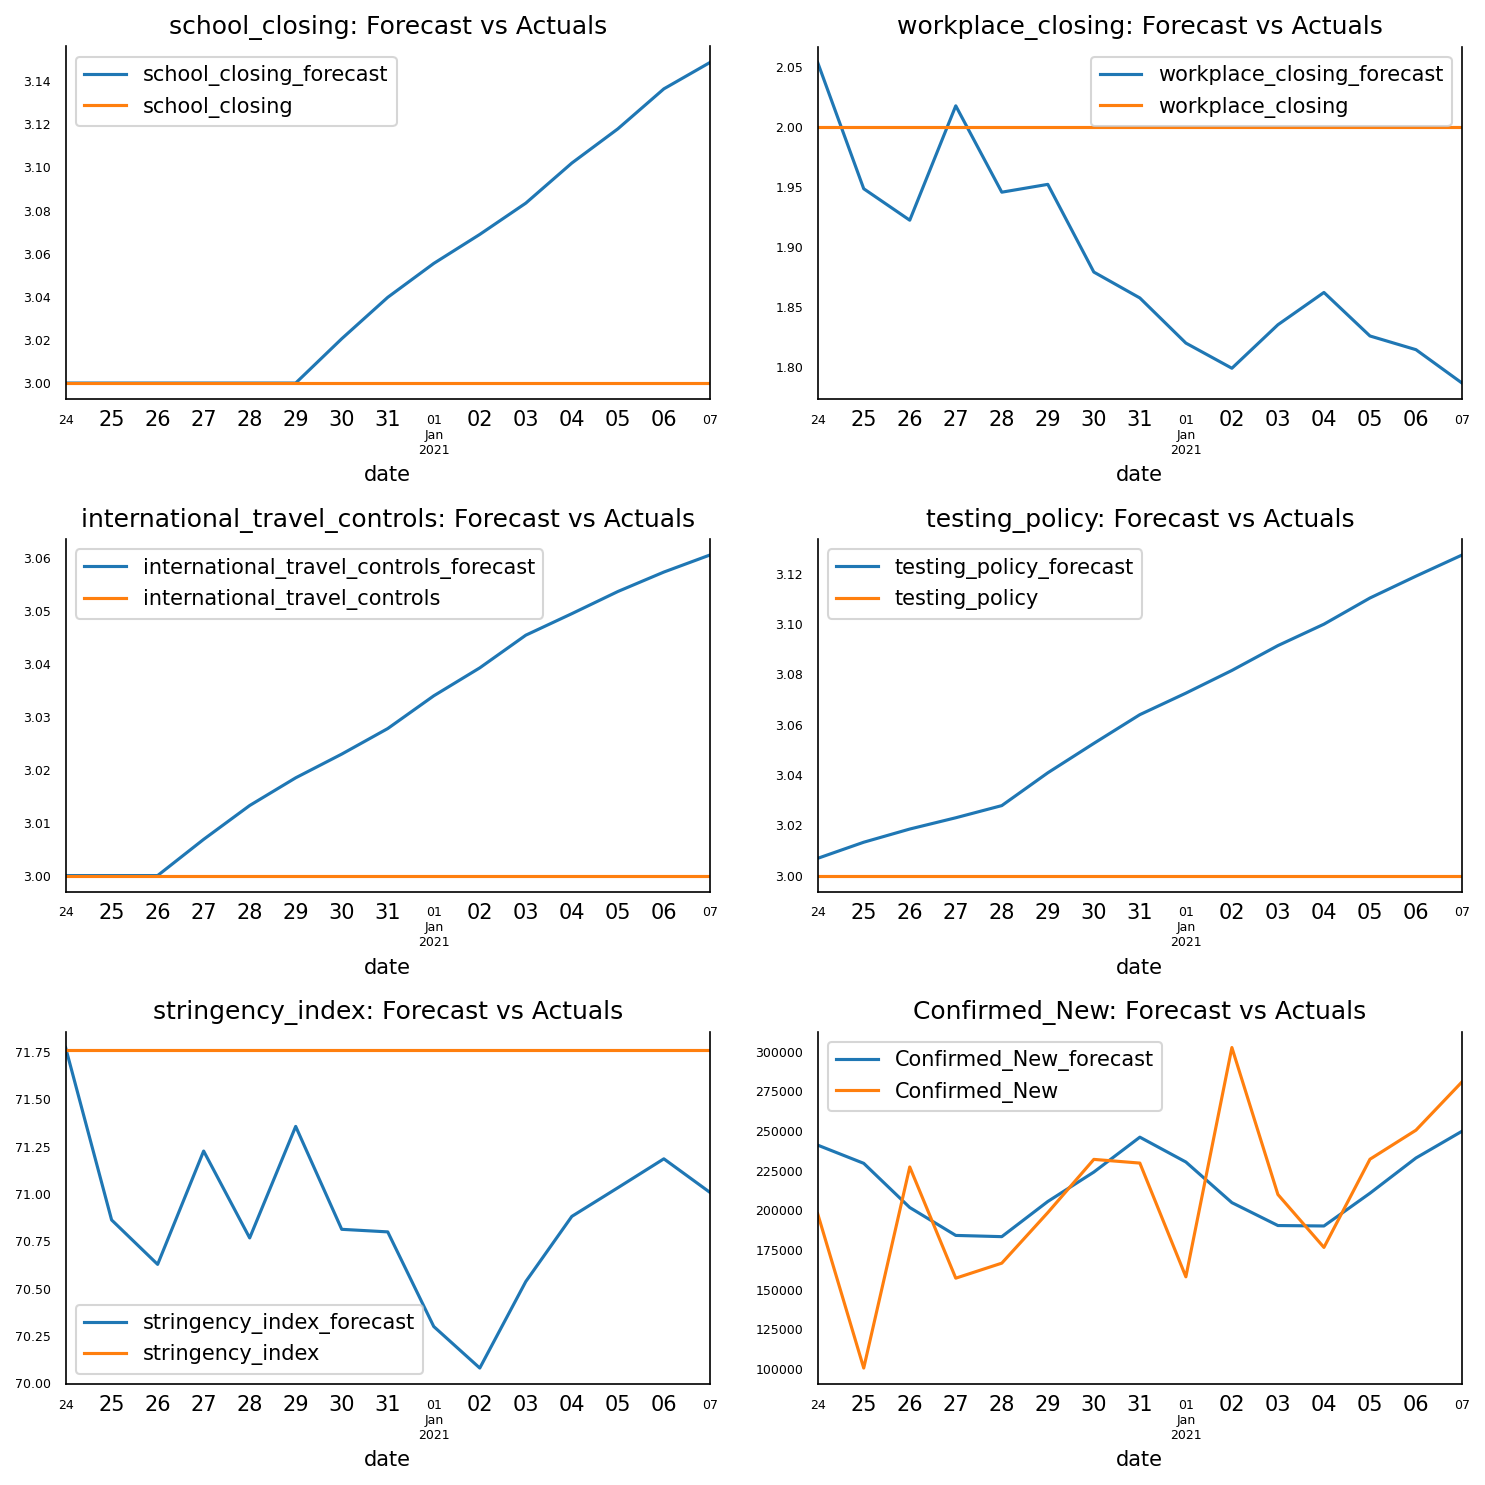

In [ ]:
# Plotting the Forecasted output Vs. Actual Output for each Variable:
fig, axes = plt.subplots(nrows=int(len(USA_data_forecast.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(USA_df.columns, axes.flatten())):
    forecast_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    USA_test[col][-step:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();


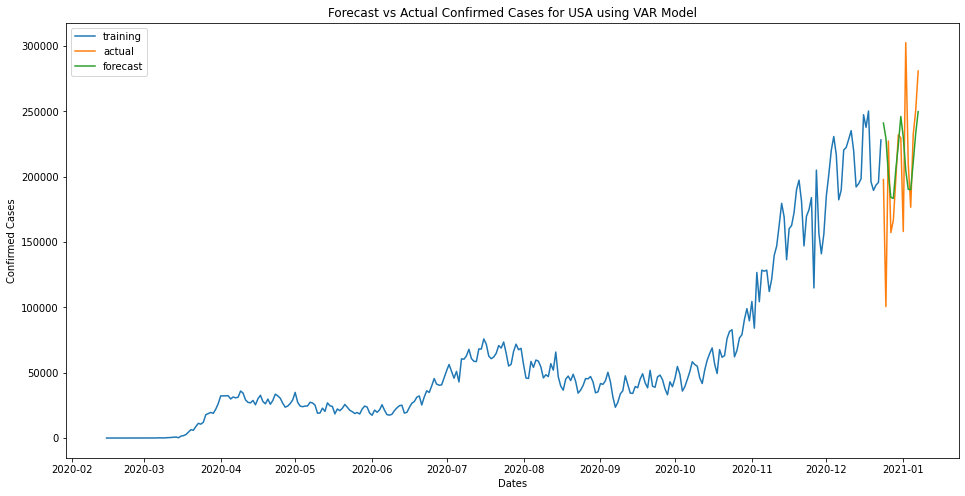

In [ ]:
# Plotting only Confirmed Cases prediction done by VAR model
plt.figure(figsize=(16, 8))
plt.plot(USA_train['Confirmed_New'][:], label = 'training')
plt.plot(USA_test['Confirmed_New'][-step:], label="actual")
plt.plot(forecast_results['Confirmed_New_forecast'], label="forecast")
plt.title("Forecast vs Actual Confirmed Cases for USA using VAR Model")
plt.xlabel('Dates')
plt.ylabel('Confirmed Cases')
plt.legend(loc="upper left")

In [ ]:
def accuracy_metrics(forecast, actual):
    
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    print('Mean Absolute Percentage Error is :', mape*100)
    
    mae = np.mean(np.abs(forecast - actual))    # MAE
    print('Mean Absolute Error is :', mae)
    
    rmse = np.sqrt(np.mean((forecast - actual)**2)) # RMSE
    print('Root Mean Squared Error is : ', rmse)

accuracy_metrics(forecast_results['Confirmed_New_forecast'], USA_test['Confirmed_New'][-step:])

# print(USA_test['Confirmed_New'][-step:])
# print(np.round(forecast_results['Confirmed_New_forecast']))

Mean Absolute Percentage Error is : 21.664461237751826
Mean Absolute Error is : 36394.16577987939
Root Mean Squared Error is :  50084.9817370483


**Around 21.6% MAPE implies that the model is about 78.4% accurate in predicting the next 15 observations.**